# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# url = "https://raw.githubusercontent.com/diegofurukawa/Python_Ebac/77fbfbb6fd3ec9b1cf26f8f619077ee52cfbed78/Profissao_Cientista_de_Dados/DataFrames/SINASC_RO_2019.csv"
# csv = requests.get(url).content
# sinasc = pd.read_csv(csv)
sinasc = pd.read_csv('SINASC_RO_2019.csv')
# sinasc = pd.read_csv(r'..\SINASC_RO_2019.csv')

print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [18]:

# - 0 a 3: 'asfixia grave'
#- 4 a 5: 'asfixia moderada'
#- 6 a 7: 'asfixia leve'
#- 8 a 10: 'normal'

sinasc.loc[(sinasc['APGAR5'] > 0) & (sinasc['APGAR5'] <= 3),'APGAR5_CATG'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5),'APGAR5_CATG'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7),'APGAR5_CATG'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10),'APGAR5_CATG'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] > 10)] = 'Não Categorizada'


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [26]:
# Selecionando apenas as colunas do grafico, melhor visual e entendimento

sinasc_grafico = sinasc[['GESTACAO', 'APGAR5', 'APGAR5_CATG', 'SEXO']]

sinasc_grafico

,GESTACAO,APGAR5,APGAR5_CATG,SEXO
0,37 a 41 semanas,10.0,normal,Masculino
1,37 a 41 semanas,9.0,normal,Feminino
2,37 a 41 semanas,10.0,normal,Feminino
3,37 a 41 semanas,10.0,normal,Feminino
4,37 a 41 semanas,10.0,normal,Feminino
...,...,...,...,...
27023,32 a 36 semanas,9.0,normal,Masculino
27024,37 a 41 semanas,9.0,normal,Masculino
27025,37 a 41 semanas,10.0,normal,Masculino
27026,32 a 36 semanas,9.0,normal,Masculino


<Axes: ylabel='count'>

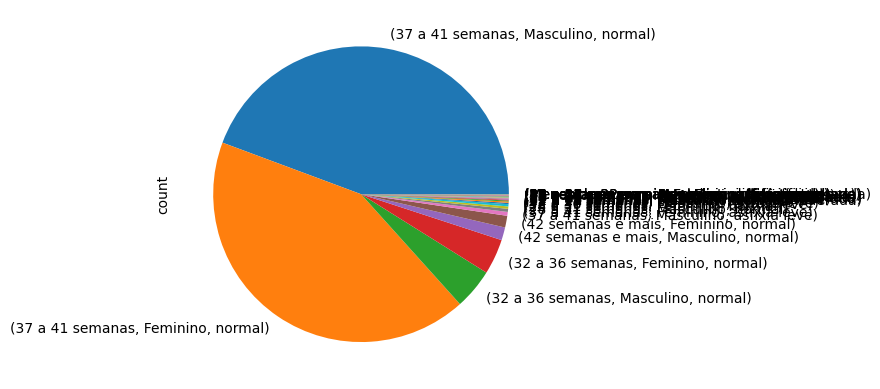

In [52]:
sinasc_grafico[['GESTACAO', 'SEXO', 'APGAR5_CATG']].value_counts().plot.pie()

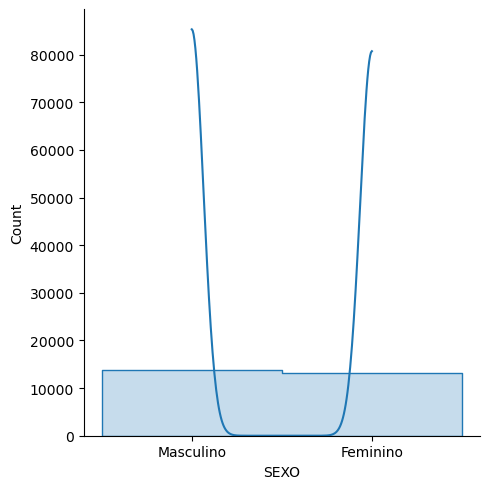

In [48]:
sns.displot(data = sinasc_grafico[['GESTACAO', 'SEXO', 'APGAR5']] 
            ,alpha = .25
            ,x = 'SEXO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [71]:


sinasc_grafico_crosstable = pd.crosstab(index = sinasc_grafico['GESTACAO'], columns = sinasc_grafico['APGAR5'])

sinasc_grafico_crosstable = sinasc_grafico_crosstable.reset_index

sinasc_grafico_crosstable


<bound method DataFrame.reset_index of APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  >

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [65]:

#sinasc_grafico_crosstable.loc[(sinasc_grafico_crosstable['GESTACAO'] == '22 a 27 semanas')] 

sinasc_grafico_crosstable.loc[1]


KeyError: 1

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.